In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv("/work/Dataset_Post_Analysis.csv", sep=",")
flights = flights.drop(columns = ['Flight_ID', 'Aeronave', 'STD-int', 'STA-int', 'Bookings'])
flights = flights.drop(columns = ['Q_Alimentos Charter',
       'Q_Bebidas Calientes', 'Q_Botanas', 'Q_Galletas', 'Q_Lacteos',
       'Q_Licores', 'Q_Perecederos', 'Q_Refrescos', 'Q_Sopas',
       'Total_Quantity'])
flights.head()

,Capacity,Passengers,DUR_HR,DepartureStation_E,ArrivalStation_E,Destination_E,Origin_E,WeekoftheYear,Month,DUR_INTERVAL,DayoftheWeek_E,Time_Interval_E,Week_Month_Label_E
0,240,229.0,2.7500,15.0,21.0,0.0,1.0,42,10,2.0,4.0,1.0,42.0
1,186,186.0,4.0000,34.0,17.0,3.0,0.0,27,7,3.0,1.0,0.0,22.0
2,220,200.0,0.6667,18.0,14.0,3.0,1.0,26,6,0.0,1.0,2.0,21.0
3,186,162.0,1.1667,22.0,0.0,4.0,1.0,6,2,1.0,0.0,1.0,57.0
4,240,183.0,0.9167,6.0,13.0,4.0,3.0,36,9,0.0,4.0,2.0,34.0


# Passengers

In [ ]:
df = flights
target_column = df["Passengers"]
X = df.drop(columns=["Passengers"])
y = target_column

In [ ]:
# Select top 5 features based on mutual info regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression


selector = SelectKBest(mutual_info_regression, k ='all')
selector.fit(X, y)
print(X.columns[selector.get_support()])
print(selector.scores_[:5])


Index(['Capacity', 'DUR_HR', 'DepartureStation_E', 'ArrivalStation_E',
       'Destination_E', 'Origin_E', 'WeekoftheYear', 'Month', 'DUR_INTERVAL',
       'DayoftheWeek_E', 'Time_Interval_E', 'Week_Month_Label_E'],
      dtype='object')
[0.59122004 0.0730601  0.12437766 0.09419919 0.01626927]


In [ ]:
! pip install skfeature-chappers -q


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


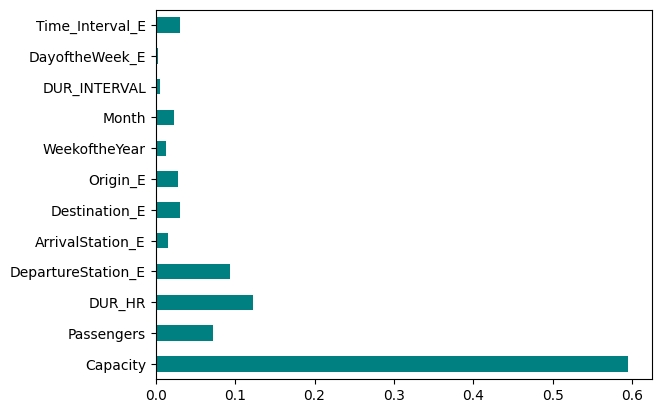

In [ ]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances, X.columns)
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

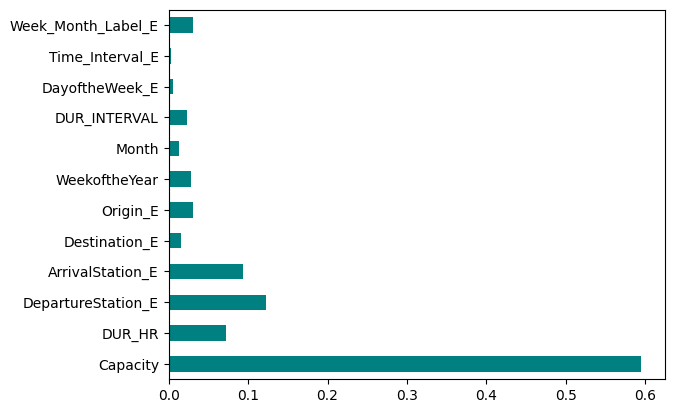

In [ ]:
feat_importances = pd.Series(importances, X.columns)
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif
anov_selector = SelectKBest(f_classif, k='all')
anov_selector.fit(X, y)
print(X.columns[anov_selector.get_support()])
print(anov_selector.scores_)

Index(['Capacity', 'DUR_HR', 'DepartureStation_E', 'ArrivalStation_E',
       'Destination_E', 'Origin_E', 'WeekoftheYear', 'Month', 'DUR_INTERVAL',
       'DayoftheWeek_E', 'Time_Interval_E', 'Week_Month_Label_E'],
      dtype='object')
[755.64497672   3.08062763  12.1892517    3.92162103   8.05219516
   3.71660719   5.42207611   5.25928776   2.87819446   2.48849953
   1.720088     2.95739475]


# Quantity

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=25b1adb0-2b47-474f-a7b7-c06d723a95f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>